# Use apriori information about data

`apriori_gamma` is weight between the image information and the apriori map.


In [14]:
from imcut import pycut
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

def make_data(sz=32, offset=0, sigma=80):
    seeds = np.zeros([sz, sz, sz], dtype=np.int8)
    seeds[offset + 12, offset + 9 : offset + 14, offset + 10] = 1
    seeds[offset + 20, offset + 18 : offset + 21, offset + 12] = 1
    img = np.ones([sz, sz, sz])
    img = img - seeds

    seeds[
        offset + 3 : offset + 15, offset + 2 : offset + 6, offset + 27 : offset + 29
    ] = 2
    img = scipy.ndimage.morphology.distance_transform_edt(img)
    segm = img < 7
    img = (100 * segm + sigma * np.random.random(img.shape)).astype(np.uint8)
    return img, segm, seeds
# make_data()


## Get the image data

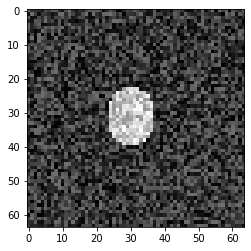

In [30]:
img, seg, seeds = make_data(64, 20)
i = 30
plt.imshow(img[i, :, :], cmap='gray')


## set the apriori map

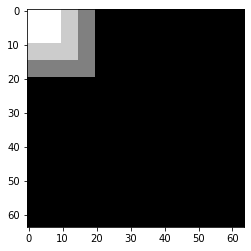

In [29]:
apriori = np.zeros([64, 64, 64])
apriori[:, :20, :20] = 0.5
apriori[:, :15, :15] = 0.8
apriori[:, :10, :10] = 1.0

plt.imshow(apriori[i, :, :], cmap='gray')
plt.show()

## Compare two different weights `apriori_gamma`

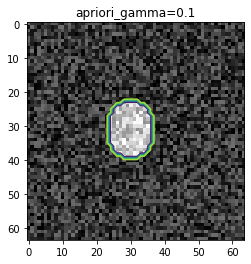

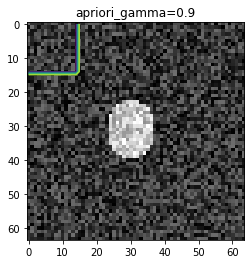

In [31]:

# Calculate witha apriori_gamma 0.1
segparams1 = {"apriori_gamma": 0.1}
gc = pycut.ImageGraphCut(img, segparams=segparams1)
gc.set_seeds(seeds)
gc.apriori = apriori
gc.run()

plt.imshow(img[i, :, :], cmap='gray')
plt.contour(gc.segmentation[i,:,:])
plt.title(f'apriori_gamma=0.1')
plt.show()

# Calculate witha apriori_gamma 0.9
segparams2 = {"apriori_gamma": 0.9}
gc = pycut.ImageGraphCut(img, segparams=segparams2)
gc.set_seeds(seeds)
gc.apriori = apriori
gc.run()

plt.imshow(img[i, :, :], cmap='gray')
plt.contour(gc.segmentation[i,:,:])
plt.title(f'apriori_gamma=0.9')
plt.show()
# assert Less(
#     np.sum(
#         np.abs((gc.segmentation == 0).astype(np.int8) - apriori.astype(np.int8))
#     ),
#     600,
# )


## See more slices

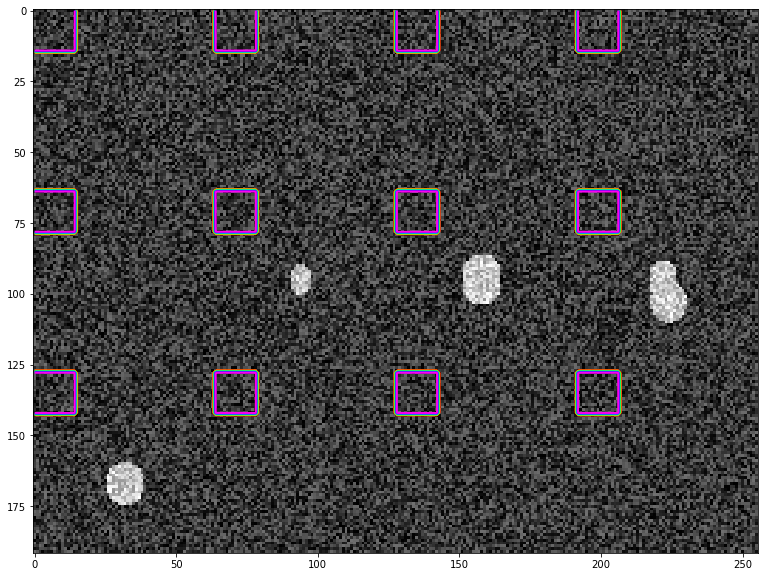

In [33]:

import sed3
plt.figure(figsize=(15,10))
sed3.show_slices(img, contour=(gc.segmentation==0), slice_number=12)
